# Visualisation notebook
In the following notebook you will see some visualisations of 
YouTube views of the indie band [Billie Garlic](https://open.spotify.com/artist/2KZoVTprHSLoYX7G38MBh9?si=R92K6MuyS7CVYXcQfcbmHw&dl_branch=1).

## 1 Set up and import of data

In [66]:
import update_csv
update_csv.main()

In [58]:
import pandas as pd
%matplotlib inline

In [59]:
DATA_PATH = '../generated/updated_video_data.csv'

In [60]:
videos_df = pd.read_csv(DATA_PATH)
videos_df

,Title,Channel,Views,URL
0,Ms Curious,Billie Garlic - Topic,8394,https://www.youtube.com/watch?v=y7jMc0eYjf4
1,Billie Garlic - Celestial Aioli (full EP),Billie Garlic,1388,https://www.youtube.com/watch?v=PHi-95P_YAk
2,Billie Garlic - Ms Curious (WARNING! Indie gon...,Billie Garlic,8715,https://www.youtube.com/watch?v=BbFhxh2eJn4
3,Billie Garlic - Celestial Aioli (Full EP),The Daily Dose,48882,https://www.youtube.com/watch?v=spmyWJ_mWMg
4,Billie Garlic - Engineering Invention,Billie Garlic,773,https://www.youtube.com/watch?v=UKwwYtknZiE
5,Best Indie Discoveries | May 2021,The Daily Dose,218043,https://www.youtube.com/watch?v=qZ12eHriNCY&t=1s
6,Billie Garlic - Celestial Aioli (FULL EP),The Cassette Box,20,https://www.youtube.com/watch?v=V8SZGXPN-YU
7,Billie Garlic - Ms Curious,The Cassette Box,163,https://www.youtube.com/watch?v=AQv_760hnvM
8,Billie Garlic - Engineering Invention,The Cassette Box,28,https://www.youtube.com/watch?v=60Vmx6Usi8M


## 2 Treatment and visualisation of data

### Calculate total amount of views

In [61]:
total_views = videos_df['Views'].sum()
print("Billie garlic has {} views on YouTube.".format(total_views))

Billie garlic has 286406 views on YouTube.


### Plot views by video in pie chart

Prepare dataframe for plot by merging videos with a too little proportion of the total views into an others category.

In [62]:
views_title_df = videos_df[videos_df['Views'] > total_views * 5 / 360][['Title', 'Views']]
removed_views = total_views - views_title_df['Views'].sum()
views_title_pie_df = views_title_df.append({'Title': "Others", 'Views': removed_views}, ignore_index = True)


<AxesSubplot:title={'center':'Views per video'}, ylabel='Views'>

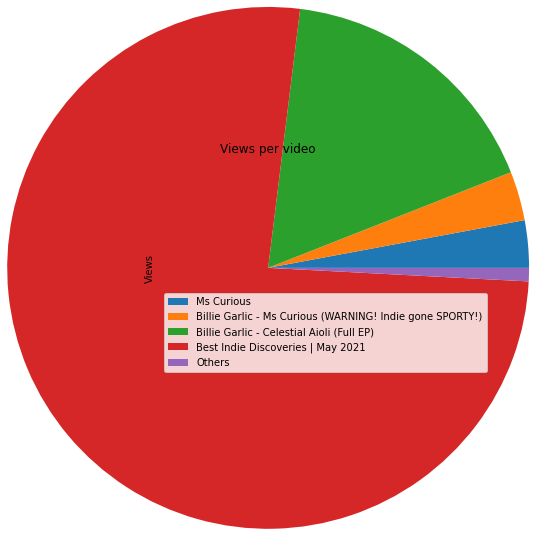

In [63]:
views_title_pie_df.plot.pie(y = 'Views', title = "Views per video", labels = views_title_pie_df['Title'],  radius = 3, labeldistance = None)

### Plot views by channel in pie chart

Group views by channel.

In [64]:
channel_df = videos_df.groupby(videos_df.Channel).sum()
channel_df

,Views
Channel,
Billie Garlic,10876
Billie Garlic - Topic,8394
The Cassette Box,211
The Daily Dose,266925


<AxesSubplot:title={'center':'Views per channel'}, ylabel='Views'>

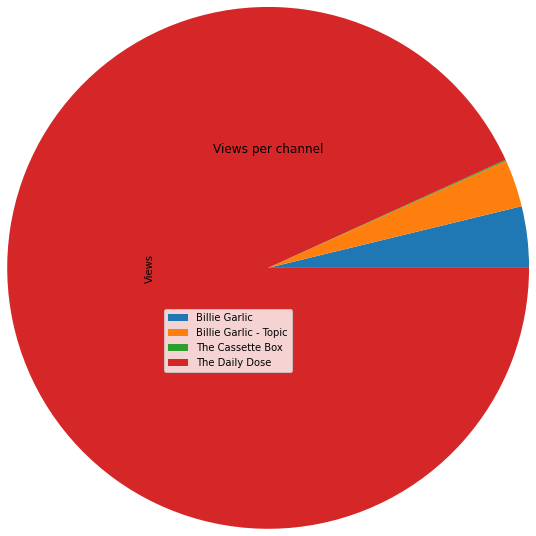

In [65]:
channel_df.plot.pie(y = 'Views', title = "Views per channel", radius = 3, labeldistance = None)